In [4]:
import numpy as np
import pandas as pd

In [5]:
 data=pd.read_csv("https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
pd.set_option('display.max_columns',None)


In [93]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [94]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
cat_features = data.select_dtypes(include=['object']).columns.tolist()
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [96]:
num_features = data.select_dtypes(include=['int']).columns.tolist()
num_features

['SeniorCitizen', 'tenure']

### UNIVARIENT ANALYSIS

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
df=data
df['DeviceProtection'].unique()




array(['No', 'Yes'], dtype=object)

In [98]:
#df['DeviceProtection'].replace('No internet service','No',inplace=True)
#print(df['DeviceProtection'].unique())  # Check unique values



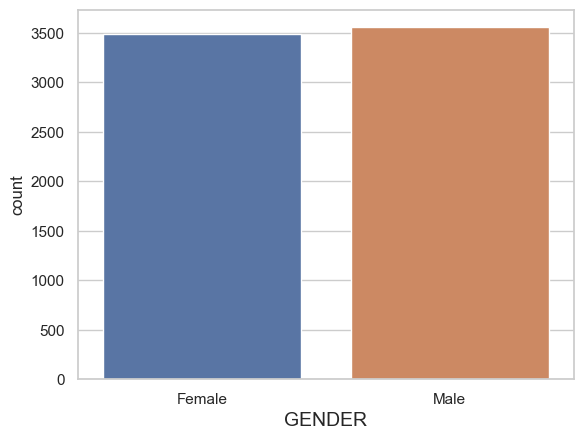

In [99]:
#plt.figure(figsize=(8,6))
sns.countplot(data=df,x='gender')
plt.xlabel('GENDER',fontsize=14)
sns.set(style="whitegrid")

In [100]:
df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

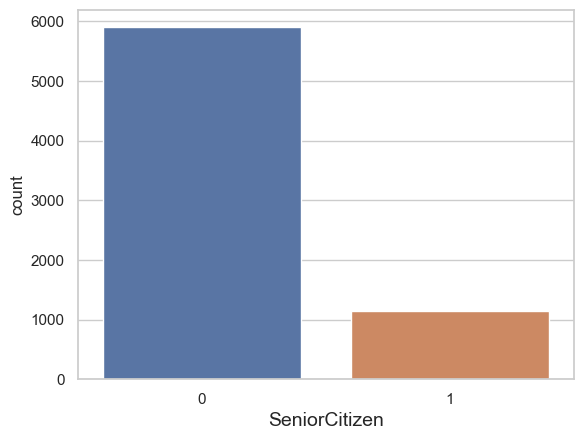

In [101]:
sns.countplot(data=df,x='SeniorCitizen')
plt.xlabel('SeniorCitizen',fontsize=14)
sns.set(style='whitegrid')

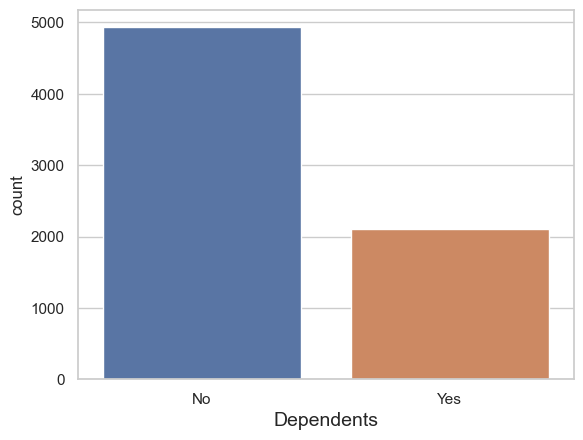

In [102]:
sns.countplot(data=df,x='Dependents')
plt.xlabel('Dependents',fontsize=14)
sns.set(style='whitegrid')

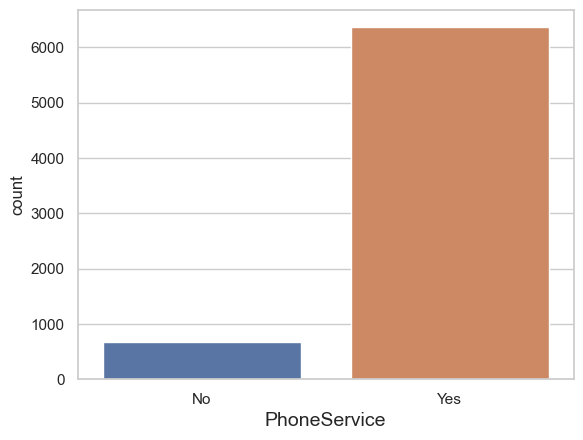

In [103]:
sns.countplot(data=df,x='PhoneService')
plt.xlabel('PhoneService',fontsize=14)
sns.set(style='whitegrid')

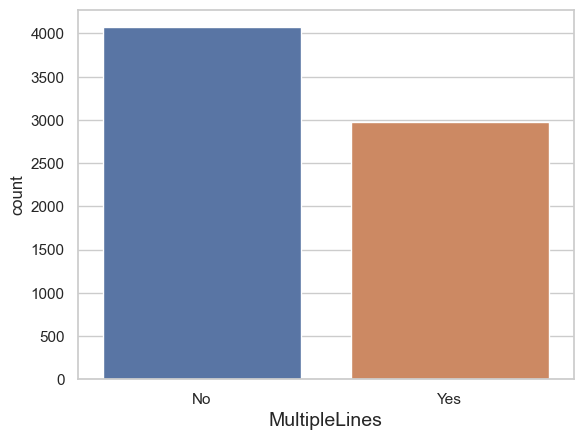

In [104]:
sns.countplot(data=df,x='MultipleLines')
plt.xlabel('MultipleLines',fontsize=14)
sns.set(style="whitegrid")


In [105]:
df["MultipleLines"].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [106]:
df['MultipleLines'].replace("No phone service","No",inplace=True)

Text(0.5, 0, 'MultipleLines')

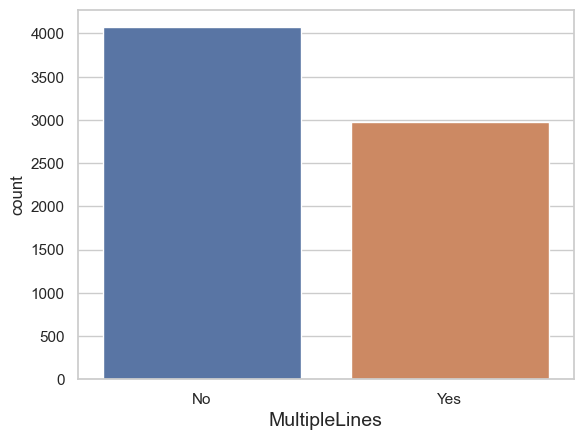

In [107]:
sns.countplot(data=df,x='MultipleLines')
plt.xlabel('MultipleLines',fontsize=14)

Text(0.5, 0, 'InternetService')

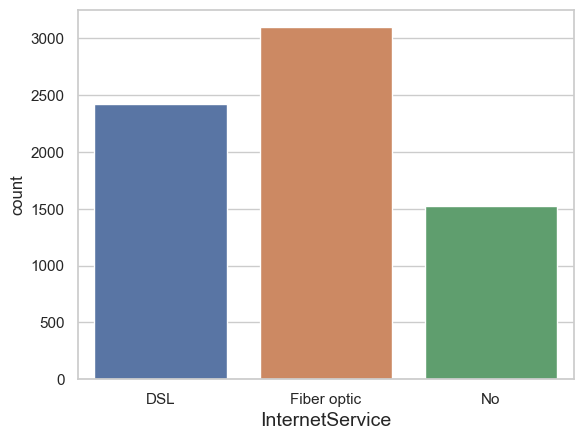

In [108]:
sns.countplot(data=df,x='InternetService')
plt.xlabel('InternetService',fontsize=14)

Text(0.5, 0, 'OnlineSecurity')

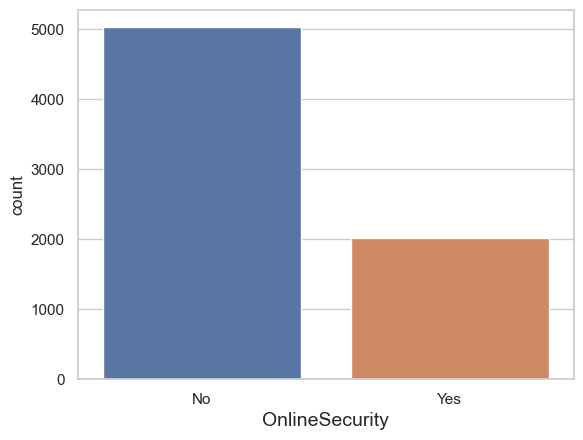

In [109]:
sns.countplot(data=df,x="OnlineSecurity")
plt.xlabel('OnlineSecurity',fontsize=14)

In [110]:
df['OnlineSecurity'].replace("No internet service","No",inplace=True)
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

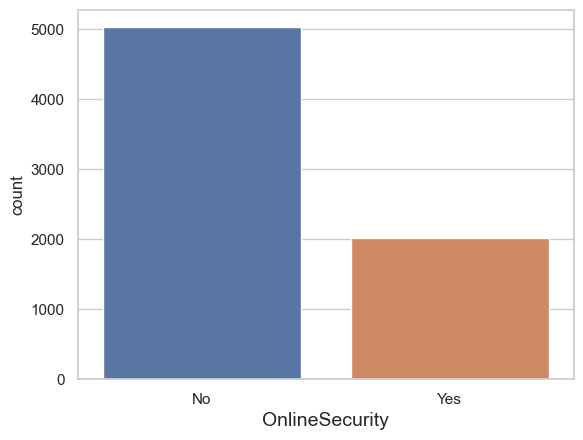

In [111]:
sns.countplot(data=df,x='OnlineSecurity')
plt.xlabel("OnlineSecurity",fontsize=14)
sns.set(style="whitegrid")
plt.show()

In [112]:
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Text(0.5, 0, 'OnlineBackup')

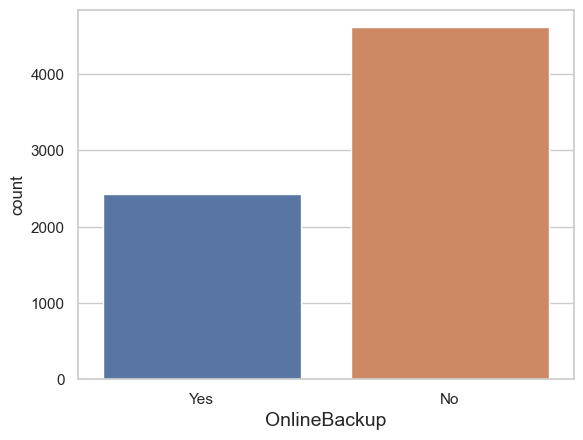

In [113]:
sns.countplot(data=df,x="OnlineBackup")
plt.xlabel("OnlineBackup",fontsize=14)

In [114]:
df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [115]:
#if there is no internet how omline back so replace NO internet service repllace with no

df["OnlineBackup"].replace("No internet service","No",inplace=True)

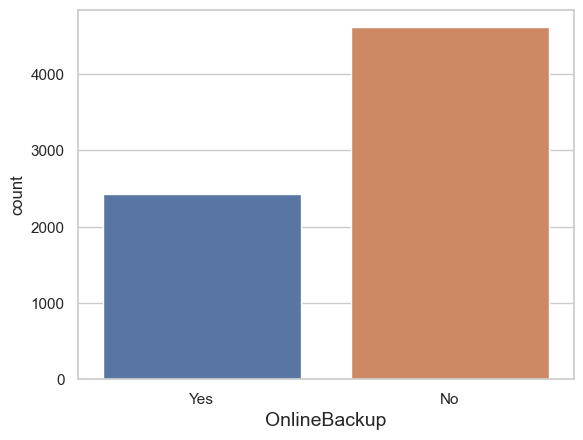

In [116]:
sns.countplot(data=df,x="OnlineBackup")
plt.xlabel('OnlineBackup',fontsize=14)
plt.show()

In [117]:
df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

Text(0.5, 0, 'DeviceProtection')

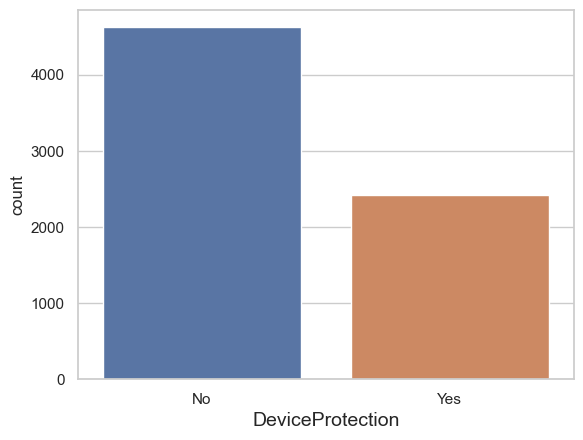

In [118]:
sns.countplot(data=df,x='DeviceProtection')
plt.xlabel('DeviceProtection',fontsize=14)

In [119]:
df['DeviceProtection'].replace('No internet service','No',inplace=True)
print(df['DeviceProtection'].unique())  # Check unique values



['No' 'Yes']


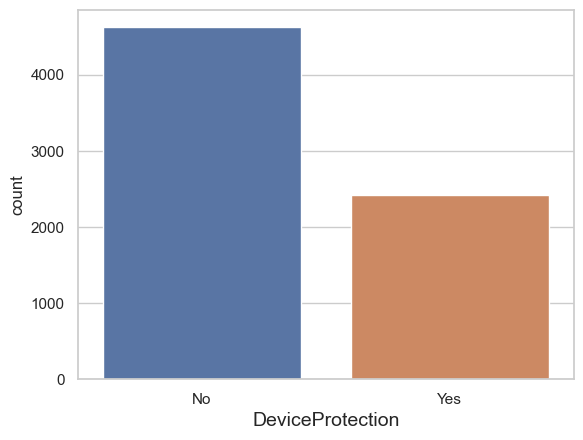

In [120]:
sns.countplot(data=df,x='DeviceProtection')
plt.xlabel('DeviceProtection',fontsize=14)
sns.set(style="whitegrid")

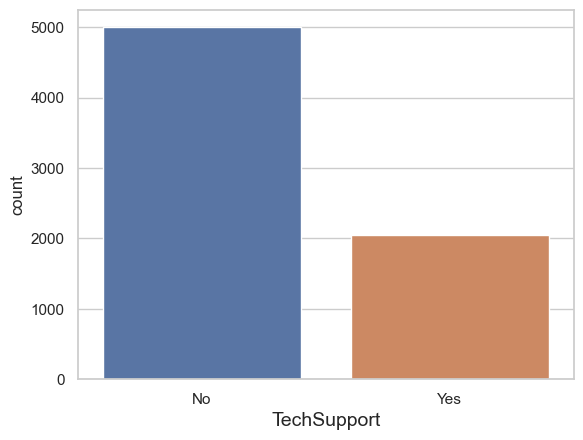

In [121]:
sns.countplot(data=df,x='TechSupport')
plt.xlabel('TechSupport',fontsize=14)
sns.set(style="whitegrid")

In [122]:
df['TechSupport'].replace('No internet service',"No",inplace=True)

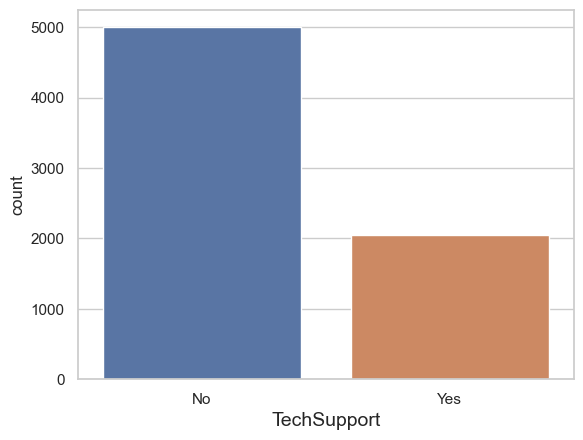

In [123]:
sns.countplot(data=df,x='TechSupport')
plt.xlabel('TechSupport',fontsize=14)
sns.set(style="whitegrid")

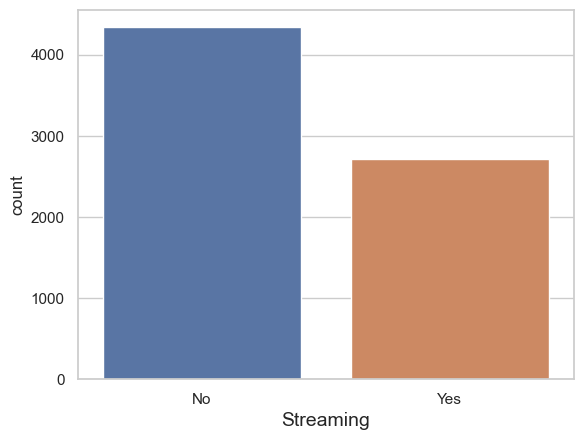

In [124]:
sns.countplot(data=df,x='StreamingTV')
plt.xlabel('Streaming',fontsize=14)
sns.set(style="whitegrid")

In [125]:
df['StreamingTV'].replace('No internet service',"No",inplace=True)

<Axes: xlabel='StreamingTV', ylabel='count'>

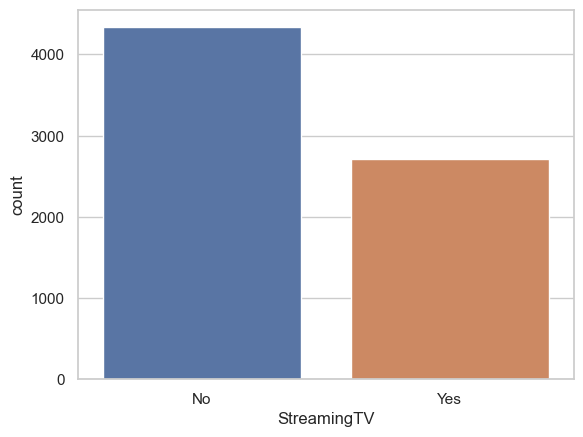

In [126]:
sns.countplot(data=df,x='StreamingTV')

<Axes: xlabel='StreamingMovies', ylabel='count'>

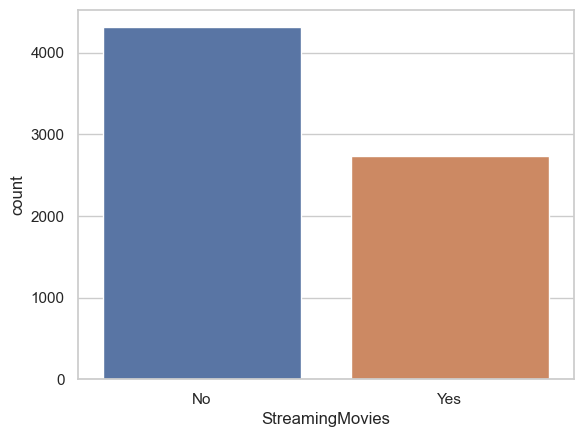

In [127]:
sns.countplot(data=df,x='StreamingMovies')

In [128]:
df['StreamingMovies'].replace('No internet service',"No",inplace=True)

<Axes: xlabel='StreamingMovies', ylabel='count'>

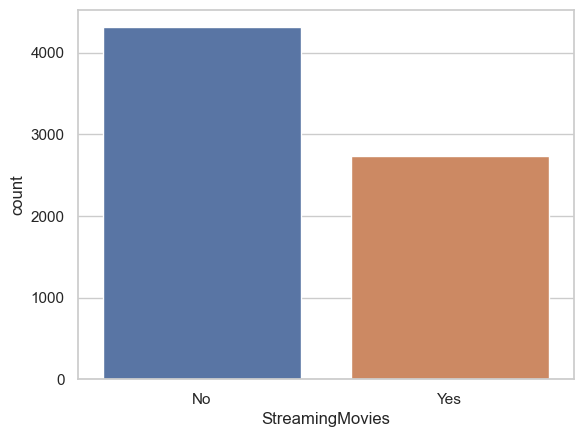

In [129]:
sns.countplot(data=df,x='StreamingMovies')

In [130]:
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [131]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='Contract', ylabel='count'>

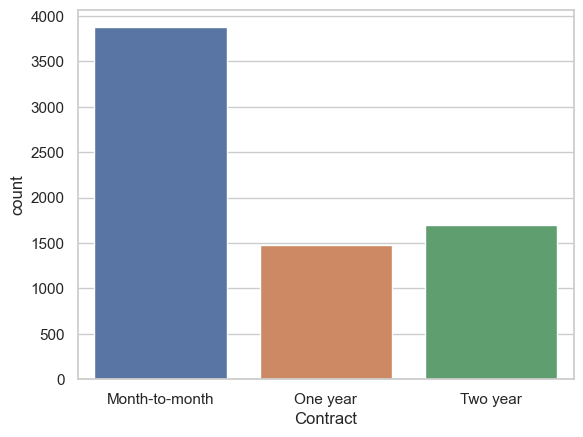

In [132]:
sns.countplot(data=df,x='Contract')

<Axes: xlabel='PaperlessBilling', ylabel='count'>

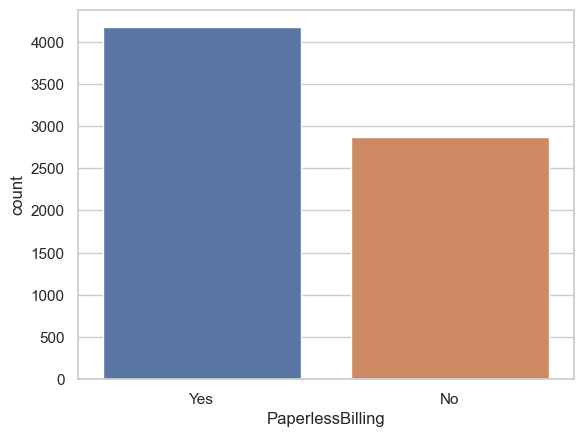

In [133]:
sns.countplot(data=df,x='PaperlessBilling')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

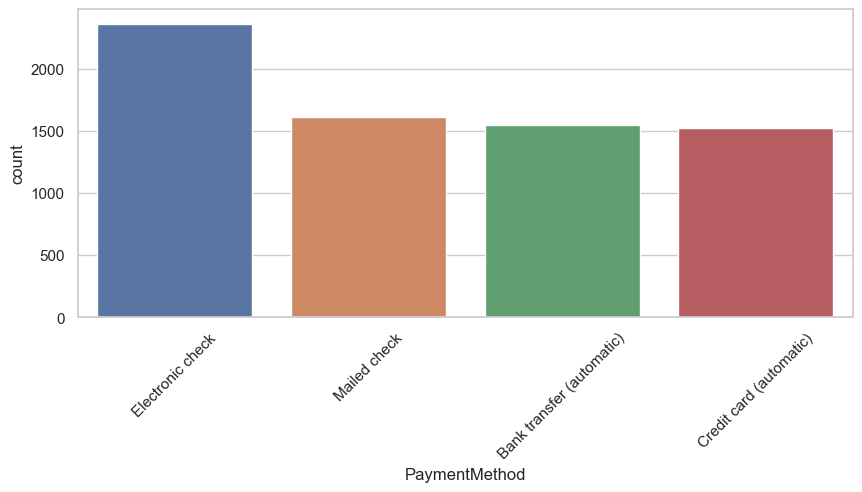

In [134]:
plt.figure(figsize=(10, 4))  # Set the figure size before creating the plot
sns.countplot(data=df, x='PaymentMethod')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

In [135]:
df["TotalCharges"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [136]:
df['TotalCharges'].isnull()
df["TotalCharges"].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [137]:

# Replace empty strings with NaN in the 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Now, you can safely convert the 'TotalCharges' column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


<Axes: xlabel='Churn', ylabel='count'>

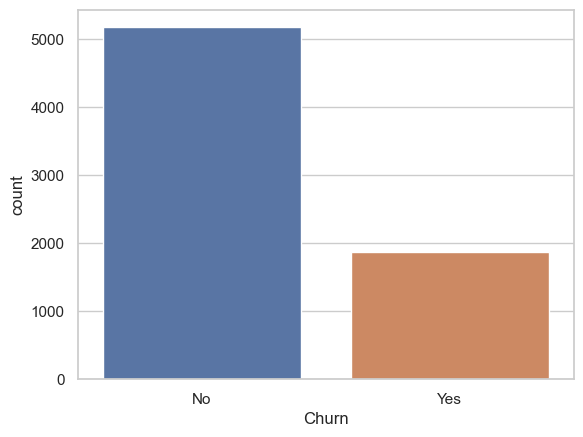

In [138]:
sns.countplot(data=df,x='Churn')

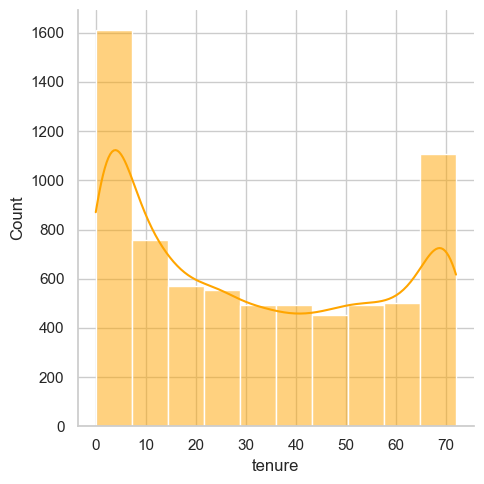

In [139]:
sns.displot(df["tenure"],kde=True,color="orange",bins=10)
#sns.set(rc={'figure.figsize':(6,4)})

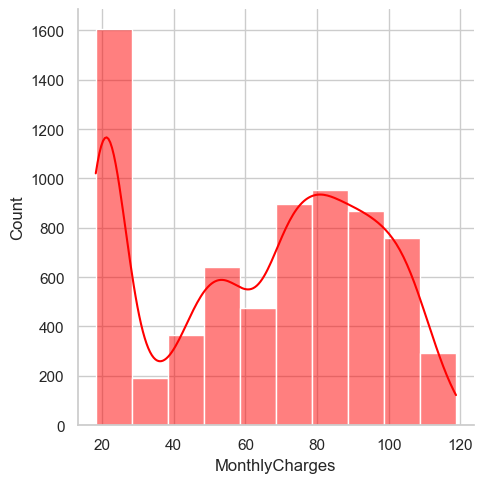

In [140]:
sns.displot(df["MonthlyCharges"],kde=True,color="red",bins=10)

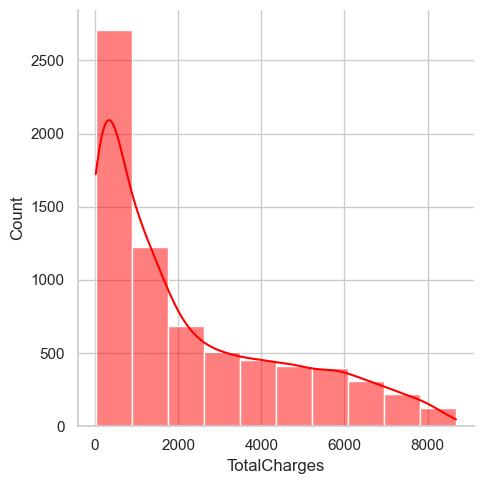

In [141]:
sns.displot(df['TotalCharges'],kde=True,color="red",bins=10)
plt.show()

### EDA

In [142]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [143]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [144]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### outerliers


In [145]:
num_cols=df.select_dtypes(include=['int','float'])
num_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


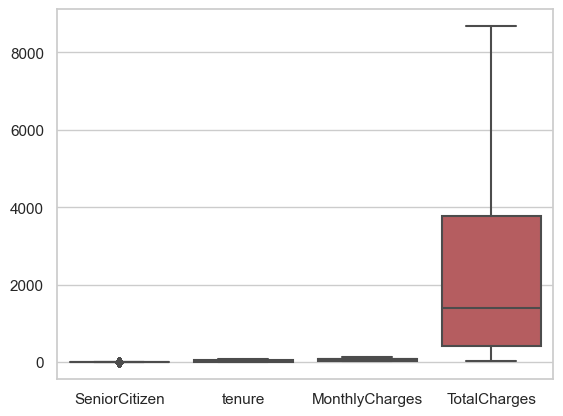

In [146]:
sns.boxplot(data=num_cols)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x157cebf5c00>,
 'caps': [<matplotlib.lines.Line2D at 0x157cebf6140>,
 'boxes': [<matplotlib.lines.Line2D at 0x157cebf5960>],
 'medians': [<matplotlib.lines.Line2D at 0x157cebf6680>],
 'fliers': [<matplotlib.lines.Line2D at 0x157cebf6920>],
 'means': []}

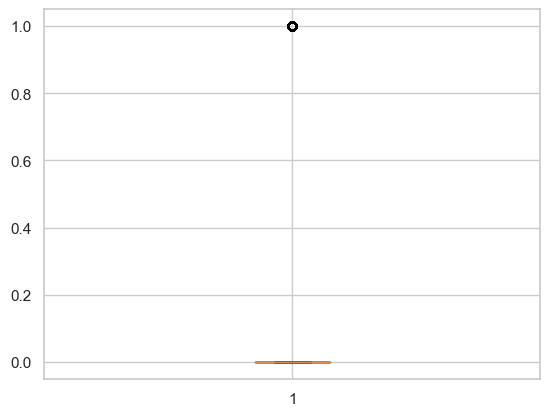

In [147]:
plt.boxplot(df['SeniorCitizen'])

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

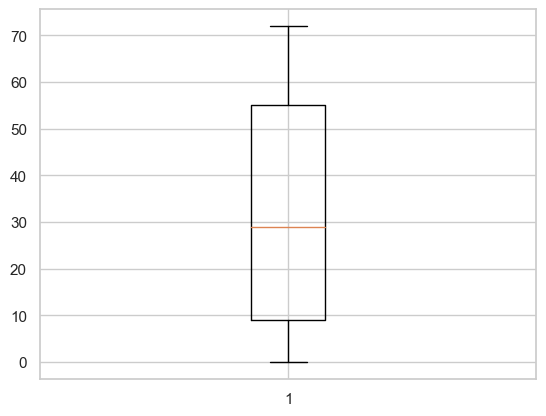

In [148]:
plt.boxplot(df['tenure'])
df['tenure'].unique()

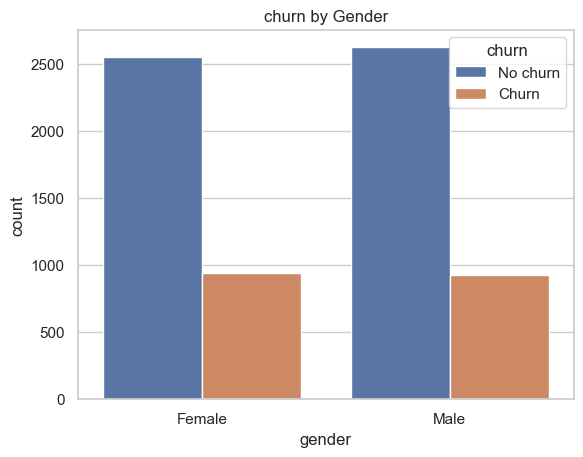

In [149]:
sns.countplot(data=df,x='gender',hue='Churn')
plt.title('churn by Gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.legend(title='churn',loc='upper right',labels=['No churn','Churn'])

### Countplot is a categorical plot that dispalys the count of observations for each category.Barplot is a numerical plot that dispalys the mean value of a numerical variable for category

In [150]:
#df['SeniorCitizen'].dtype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

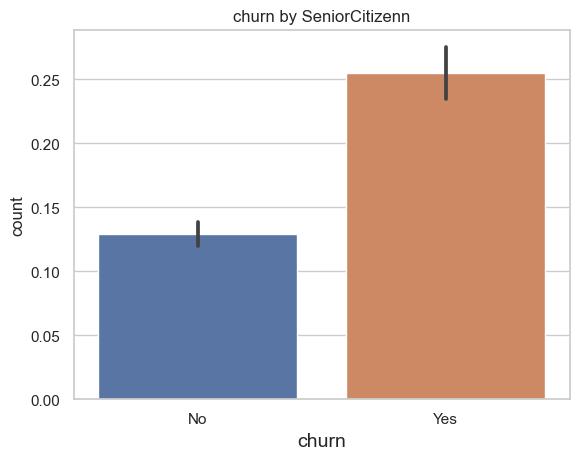

In [151]:
#it is a quantitative so go for barplot
sns.barplot(data=df,x='Churn',y='SeniorCitizen')
plt.xlabel('churn',fontsize=14)
plt.ylabel('count')
plt.title('churn by SeniorCitizenn')
plt.show()


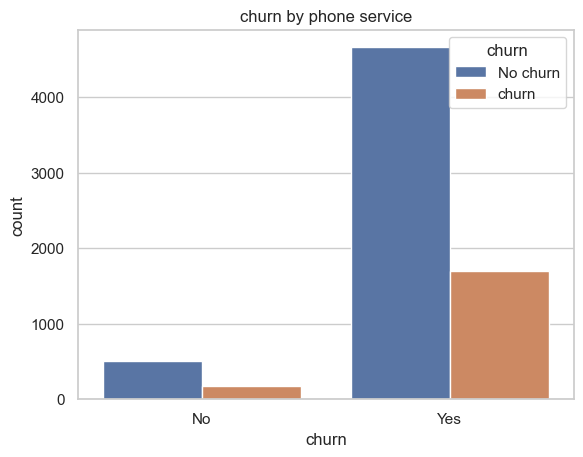

In [152]:
sns.countplot(data=df,x="PhoneService",hue='Churn')
plt.title('churn by phone service')
plt.xlabel('churn')
plt.ylabel('count')
plt.legend(title='churn',loc='upper right',labels=['No churn','churn'])
plt.show()

Text(0.5, 1.0, 'churn by Dependents')

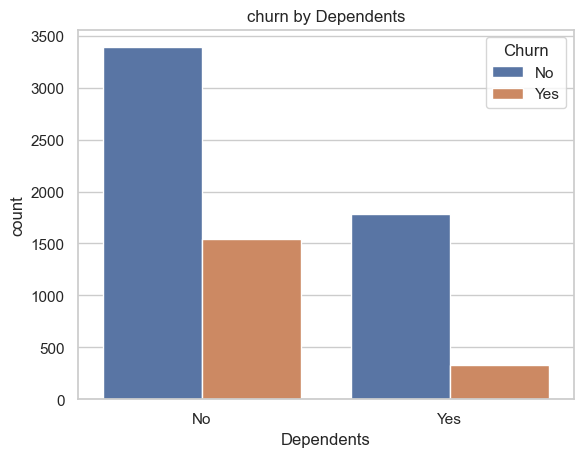

In [153]:
sns.countplot(data=df,x='Dependents',hue='Churn')
plt.title('churn by Dependents')

Text(0.5, 1.0, 'churn by MulitileLines')

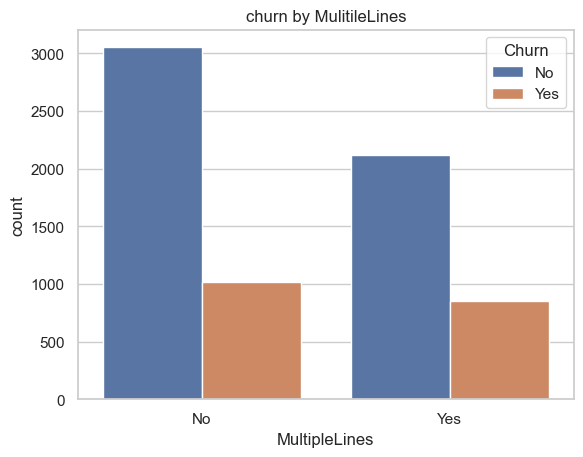

In [154]:
sns.countplot(data=df,x='MultipleLines',hue='Churn')
plt.title('churn by MulitileLines')

Text(0.5, 1.0, 'churn by Internet service')

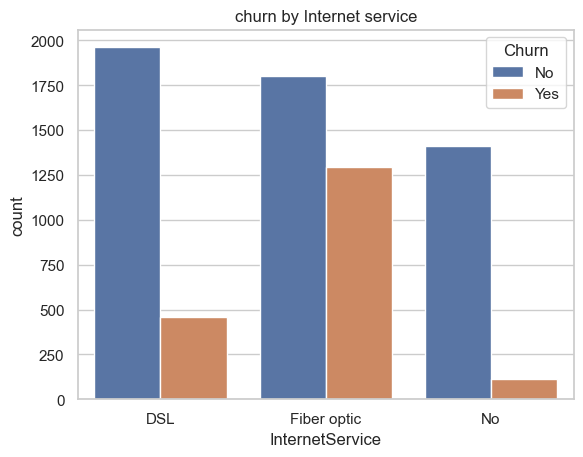

In [155]:
sns.countplot(data=df,x='InternetService',hue='Churn')
plt.title('churn by Internet service')

Text(0.5, 1.0, 'churn by Onlinesecurity')

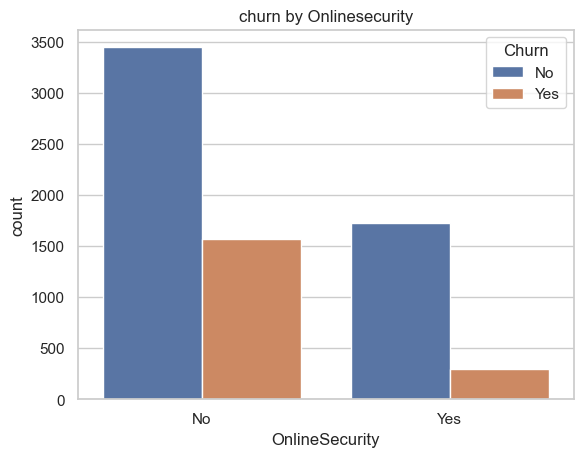

In [156]:
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')
plt.title('churn by Onlinesecurity')

Text(0.5, 1.0, 'churn by OnlineBackup')

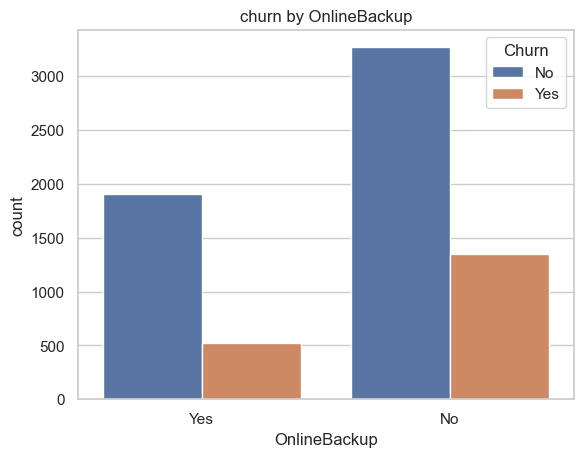

In [157]:
sns.countplot(data=df,x='OnlineBackup',hue='Churn')
plt.title('churn by OnlineBackup')

In [158]:
df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

Text(0.5, 1.0, 'churn by DeviceProtection')

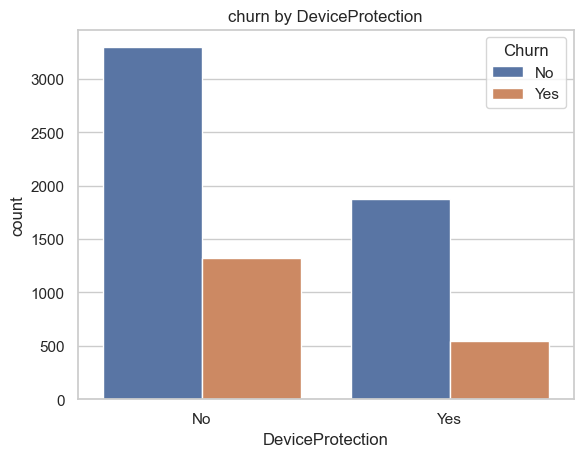

In [159]:
sns.countplot(data=df,x='DeviceProtection',hue='Churn')
plt.title('churn by DeviceProtection')

Text(0.5, 1.0, 'churn by TechSupport')

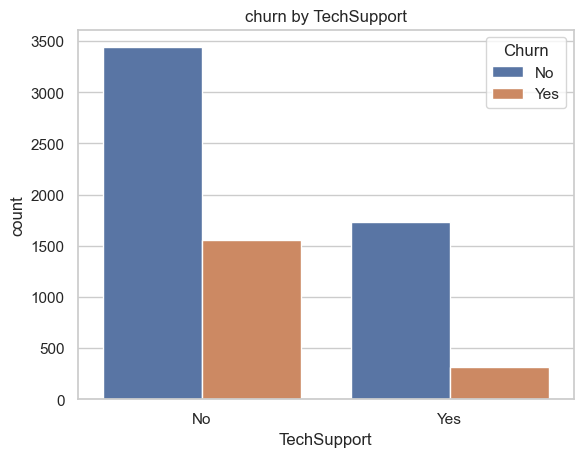

In [160]:
sns.countplot(data=df,x='TechSupport',hue='Churn')
plt.title('churn by TechSupport')

Text(0.5, 1.0, 'churn by StreamingTV')

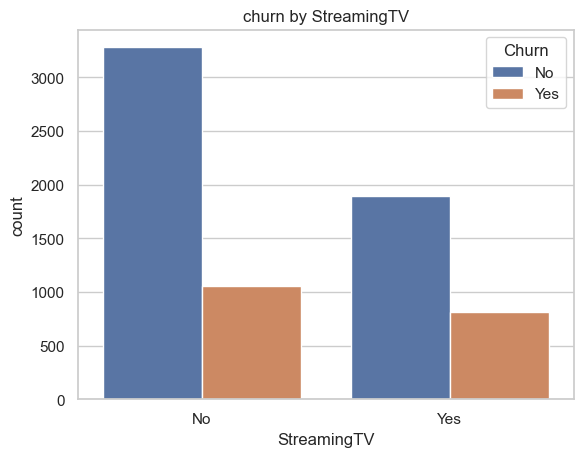

In [161]:
sns.countplot(data=df,x='StreamingTV',hue='Churn')
plt.title('churn by StreamingTV')

Text(0.5, 1.0, 'churn by StreamingMovies')

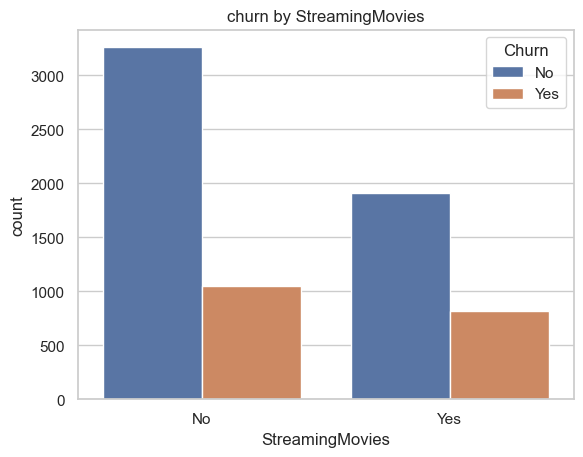

In [162]:
sns.countplot(data=df,x='StreamingMovies',hue='Churn')
plt.title('churn by StreamingMovies')

Text(0.5, 0, 'one year contract')

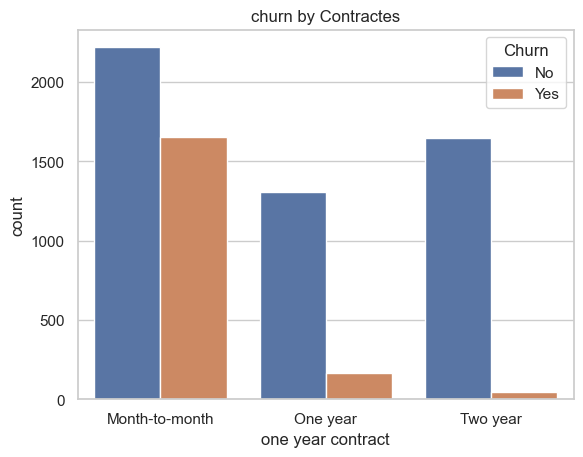

In [163]:
sns.countplot(data=df,x='Contract',hue='Churn')
plt.title('churn by Contractes')
plt.xlabel('one year contract')

Text(0.5, 1.0, 'churn by paperBilling')

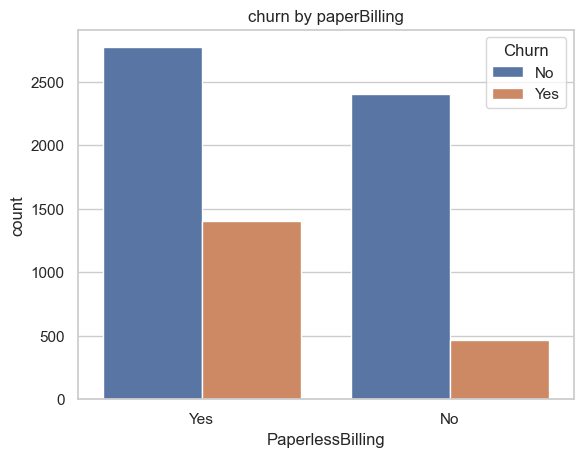

In [164]:
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')
plt.title('churn by paperBilling')

Text(0.5, 1.0, 'churn by TechSupport')

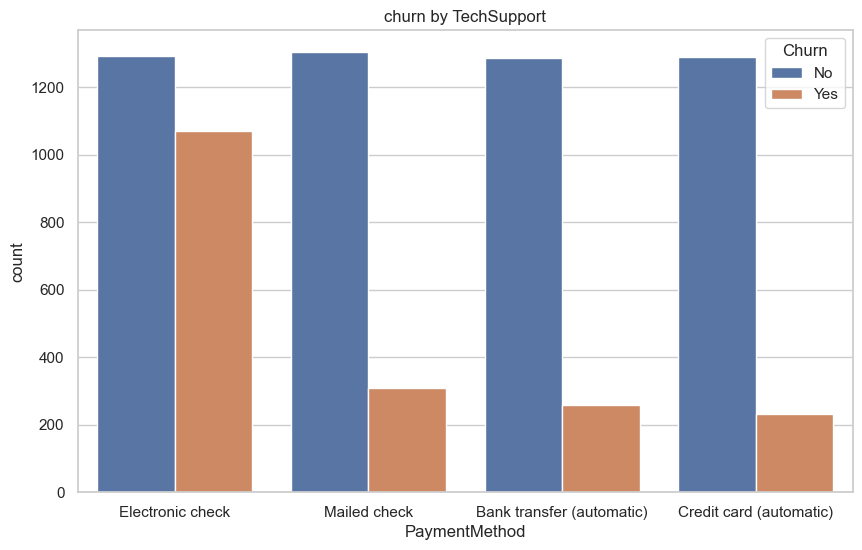

In [165]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.title('churn by TechSupport')

In [166]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [167]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

Text(0.5, 1.0, 'churn by TechSupport')

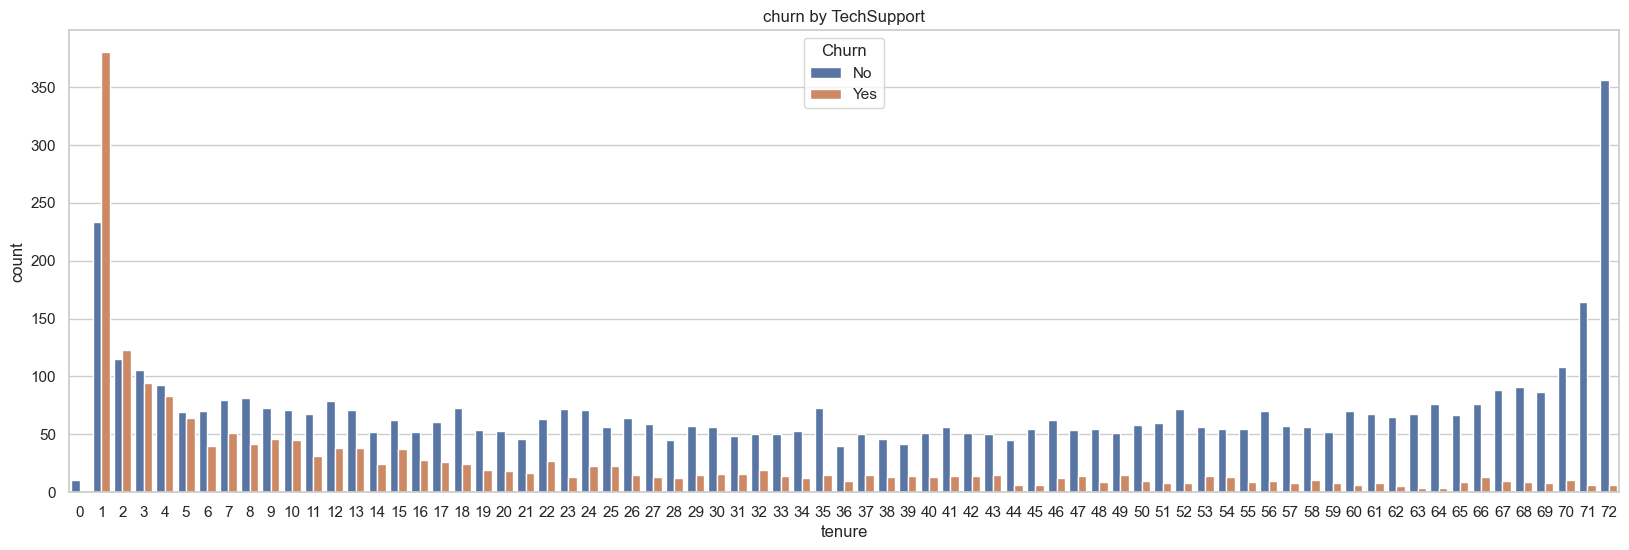

In [168]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='tenure',hue='Churn')
plt.title('churn by TechSupport')

Text(0.5, 1.0, 'churn by tenure')

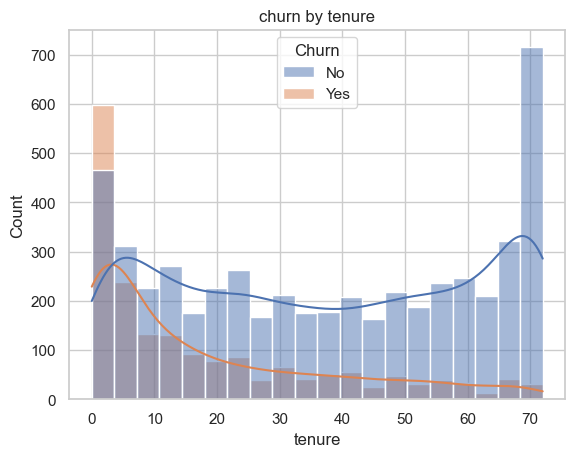

In [169]:
sns.histplot(data=df,x='tenure',hue="Churn",kde=True,bins=20)
plt.title('churn by tenure')

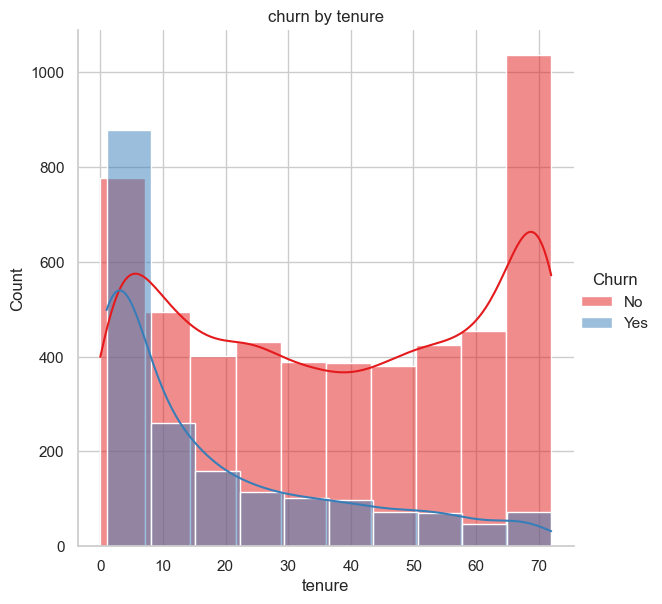

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(df, hue='Churn', palette='Set1', height=6)
g.map(sns.histplot, 'tenure', kde=True, bins=10)
g.add_legend(title='Churn')
plt.title('churn by tenure')
plt.show()


Text(0.5, 1.0, 'churn MonthlyCharges')

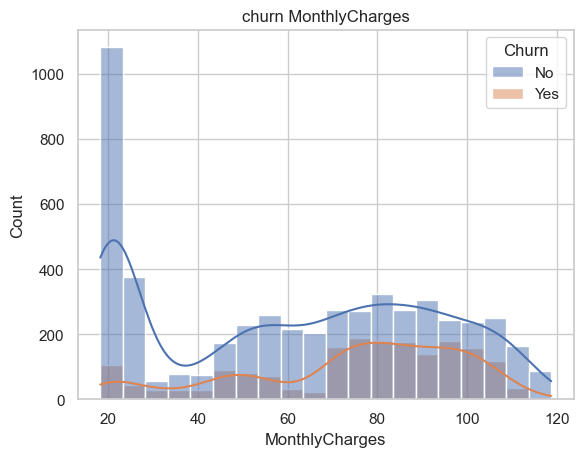

In [171]:
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True,bins=20)
plt.title('churn MonthlyCharges')

Text(0.5, 1.0, 'churn by Totalcharges')

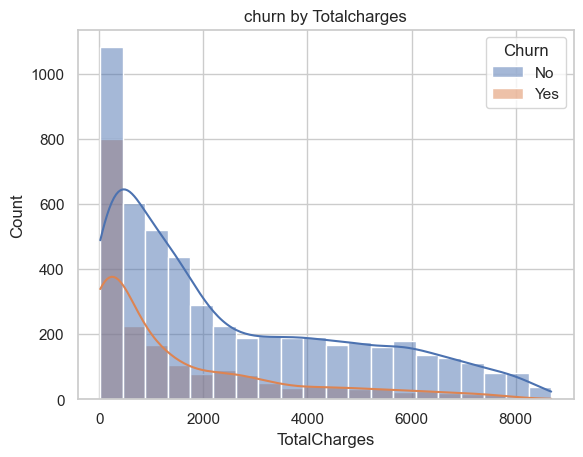

In [172]:
sns.histplot(data=df,x='TotalCharges',hue='Churn',kde=True,bins=20)
plt.title('churn by Totalcharges')

In [173]:


data_types = df.dtypes

# Get unique value counts for each column
unique_counts = df.nunique()

# Combine the data types and unique counts into a single DataFrame
data_info = pd.DataFrame({'Data Type': data_types, 'Unique Count': unique_counts})

# Display the information
print(data_info)


                 Data Type  Unique Count
customerID          object          7043
gender              object             2
SeniorCitizen        int64             2
Partner             object             2
Dependents          object             2
tenure               int64            73
PhoneService        object             2
MultipleLines       object             2
InternetService     object             3
OnlineSecurity      object             2
OnlineBackup        object             2
DeviceProtection    object             2
TechSupport         object             2
StreamingTV         object             2
StreamingMovies     object             2
Contract            object             3
PaperlessBilling    object             2
PaymentMethod       object             4
MonthlyCharges     float64          1585
TotalCharges       float64          6531
Churn               object             2


In [224]:
from sklearn.preprocessing import StandardScaler #Normalize data

from sklearn.preprocessing import LabelEncoder #convert categorical to numeric 

from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA


In [192]:
# Create a copy of the DataFrame 'df'
df1 = df.copy()

# Initialize a LabelEncoder
le = LabelEncoder()

# Select columns with object data type (categorical columns)
label = df1.select_dtypes(include=['object'])

# Encode each selected column and replace it in the DataFrame

for i in label.columns:
    df1[i] = le.fit_transform(df1[i])

# Check the shape of the resulting DataFrame
print(df1.shape)


(7043, 21)


In [193]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [194]:
df1.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [195]:
X = df1.iloc[:,1:20]
Y= df1.iloc[:,-1]#select colum


In [196]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


# feature enginnering

###  Mutual information

In [197]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif


In [199]:
mi_score1 = mutual_info_classif(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

gender              0.000000
DeviceProtection    0.000000
OnlineBackup        0.000000
PhoneService        0.002653
StreamingMovies     0.002843
StreamingTV         0.005361
MultipleLines       0.006985
SeniorCitizen       0.007733
Partner             0.015851
Dependents          0.018835
TechSupport         0.020438
PaperlessBilling    0.021700
OnlineSecurity      0.025941
TotalCharges        0.042832
PaymentMethod       0.043290
MonthlyCharges      0.049258
InternetService     0.059783
tenure              0.071264
Contract            0.094435
dtype: float64

<Axes: >

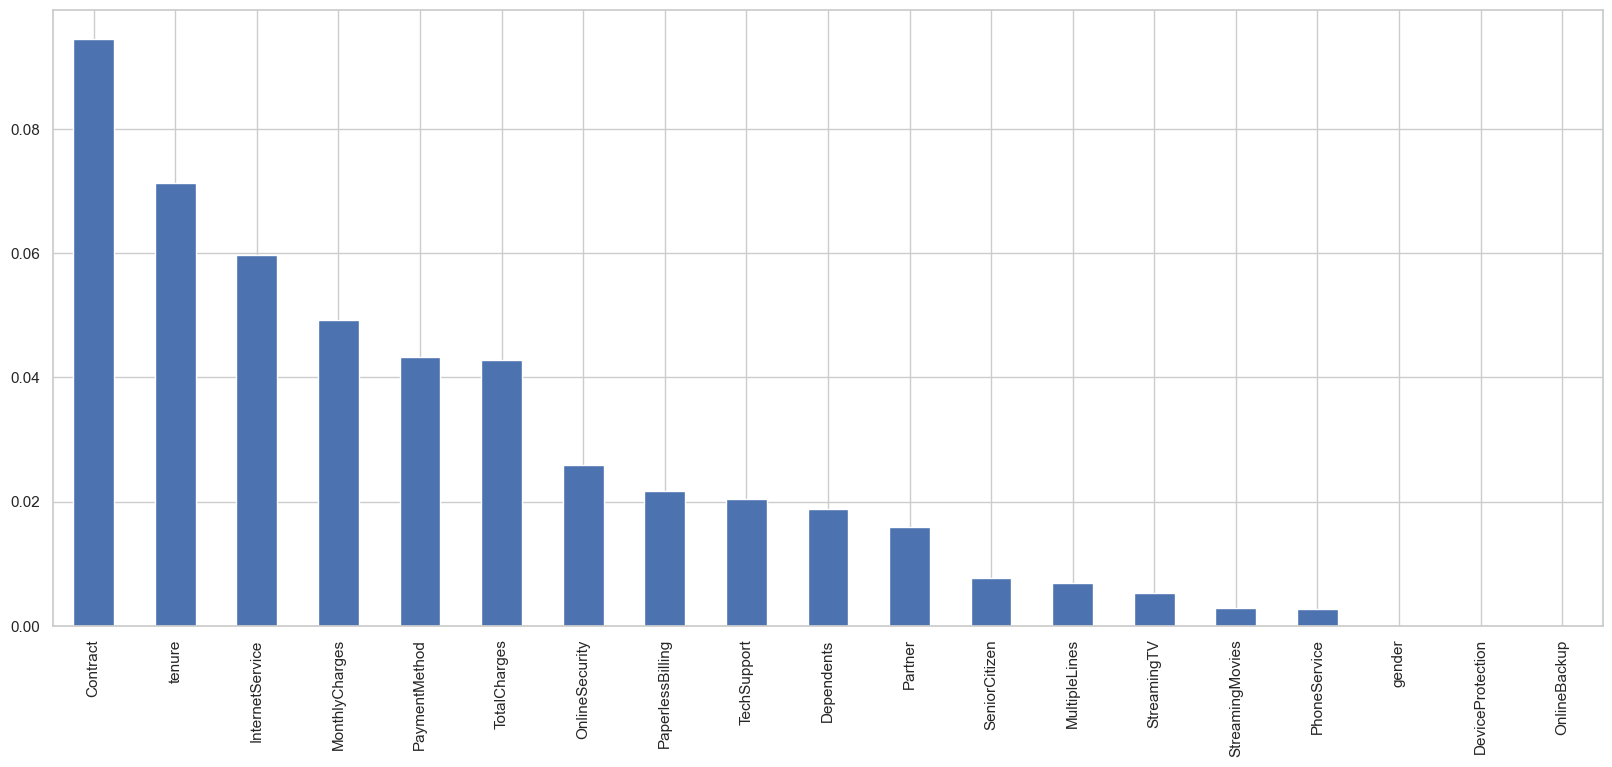

In [208]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [212]:
X["usage_Bill_ratio"]=X["MonthlyCharges"]/X['TotalCharges']

In [213]:
mi_score1 = mutual_info_classif(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

gender              0.000000
StreamingTV         0.000000
MultipleLines       0.000000
PhoneService        0.000000
StreamingMovies     0.000440
DeviceProtection    0.002702
OnlineBackup        0.003215
SeniorCitizen       0.011573
Dependents          0.012035
OnlineSecurity      0.014248
TechSupport         0.016807
PaperlessBilling    0.017719
Partner             0.019438
PaymentMethod       0.036912
MonthlyCharges      0.044236
TotalCharges        0.044547
InternetService     0.065170
tenure              0.068141
usage_Bill_ratio    0.078060
Contract            0.095100
dtype: float64

<Axes: >

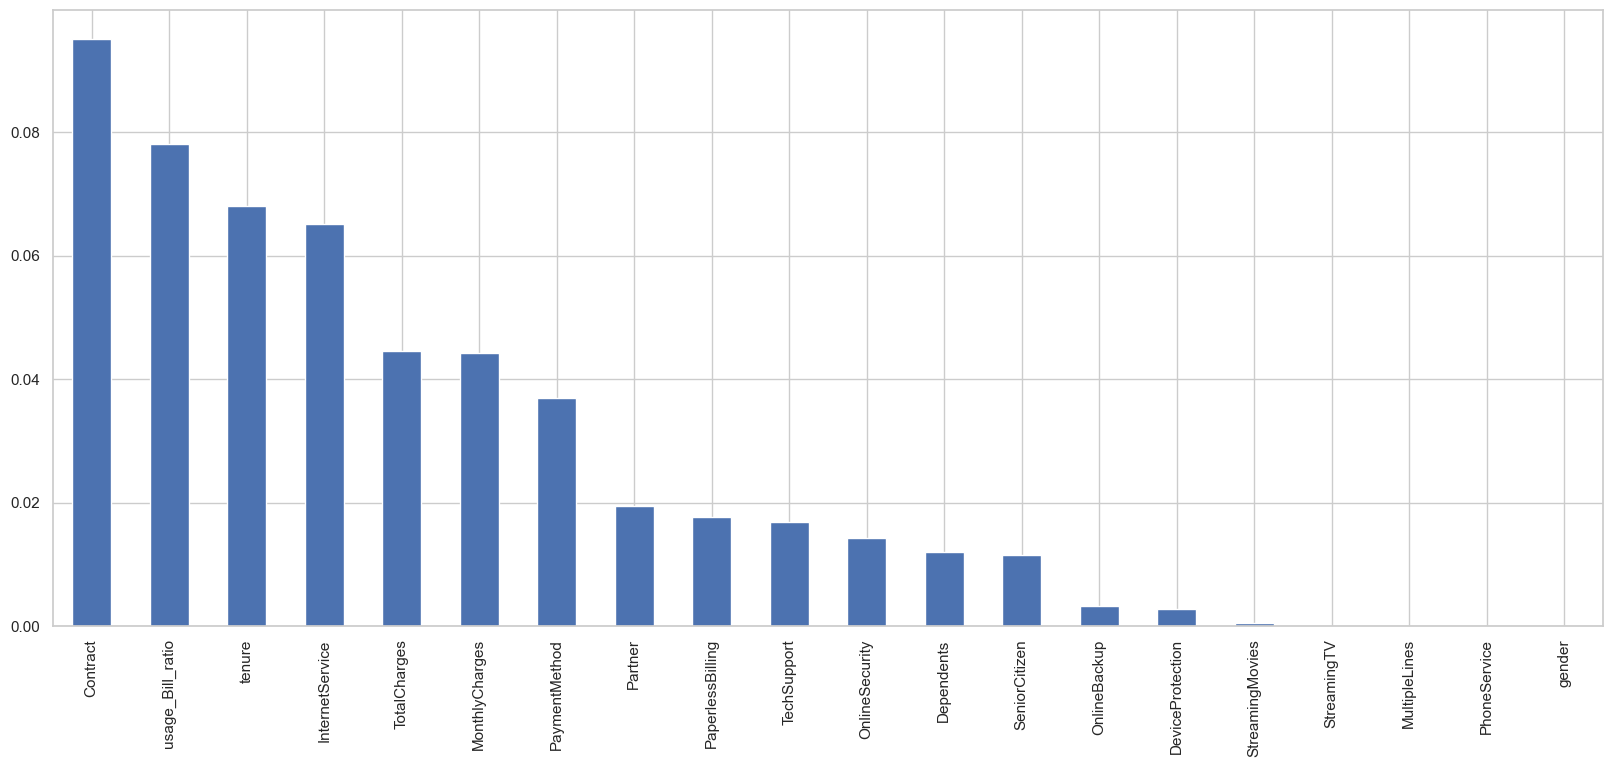

In [214]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20,8))

###  splite data into train and test

In [218]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3,random_state=0)

In [219]:
print('train_data',train_data.shape)
print('test_data',test_data.shape)
print('train_label',train_label.shape)
print('test_label',test_label.shape)

train_data (4930, 20)
test_data (2113, 20)
train_label (4930,)
test_label (2113,)


### Normalize data


In [225]:
sc = StandardScaler()
train_data_sc=sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [226]:
train_data_sc

array([[-1.00040576, -0.43584282, -0.97515638, ...,  0.2679385 ,
        -0.72323288, -0.16025275],
       [ 0.9995944 , -0.43584282,  1.02547655, ...,  0.59379741,
        -0.48657117, -0.30971412],
       [-1.00040576, -0.43584282,  1.02547655, ..., -0.56926825,
         0.38383476, -0.50305167],
       ...,
       [ 0.9995944 , -0.43584282,  1.02547655, ..., -1.47498893,
        -0.48614983, -0.49492044],
       [ 0.9995944 ,  2.29440511, -0.97515638, ...,  0.162661  ,
        -0.98120567,  2.98765861],
       [-1.00040576, -0.43584282, -0.97515638, ..., -1.48668643,
        -0.97022858,  0.20824432]])

In [228]:
pc=PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
train_data_sc_pc = pc.fit_transform(test_data_sc)

In [231]:
explained_variance = pc.explained_variance_ratio_

In [234]:
print('Explained variance ratio: ',explained_variance)

Explained variance ratio:  [0.26601751 0.12038946 0.08823149 0.05539285 0.05289656 0.05013938
 0.0434714  0.04244379 0.03779591 0.03511224 0.03293231 0.03065361
 0.02925097 0.02788296 0.02294055 0.02261062 0.01730973 0.01524821
 0.0066832  0.00259725]
